### Lineare Regression: erneutes Training und Regularisierung ###

In dieser Aufgabe werden wir anhand von Beispielen sehen, wie lineare Modelle neu trainiert werden, analysieren, warum dies geschieht, und herausfinden, wie Übertraining diagnostiziert und kontrolliert werden kann.

In allen Zellen, in denen ein Kommentar mit Anweisungen angegeben ist, müssen Sie Code schreiben, der diese Anweisungen ausführt. Die restlichen Zellen mit dem Code (keine Kommentare) müssen nur noch ausgeführt werden. Darüber hinaus müssen Sie in der Aufgabe Fragen beantworten. Antworten müssen nach dem hervorgehobenen Wort "Antwort:" eingegeben werden.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Wir werden mit dem Datensatz "bikes_rent.csv" https://drive.google.com/file/d/1-4wgz9AFXrD3tZfqHJLMhCmy4BUzAX96/view arbeiten, der Kalenderinformationen und Wetterbedingungen aufzeichnet, die für automatisierte Fahrradverleihstellen charakteristisch sind, sowie die Anzahl der Ausleihen an diesem Tag. Letzteres werden wir vorwegnehmen; Damit werden wir das Regressionsproblem lösen.

***Aufgabe 1***

Laden Sie den Datensatz mit der Funktion pandas.read_csv in die Variable df. Geben Sie die ersten 5 Zeilen aus, um sicherzustellen, dass die Daten korrekt gelesen werden:

In [139]:
df=pd.read_csv('bikes_rent.csv')
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [104]:
df.isna().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

In [105]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [107]:
print(f'Season: {df["season"].unique()}')
print(f'yr: {df["yr"].unique()}')
print(f'mnth: {df["mnth"].unique()}')
print(f'holiday: {df["holiday"].unique()}')
print(f'weekday: {df["weekday"].unique()}')
print(f'workingday: {df["workingday"].unique()}')
print(f'weathersit: {df["weathersit"].unique()}')
#print(f'temp: {df["temp"].unique()}')
#print(f'atemp: {df["atemp"].unique()}')
#print(f'hum: {df["hum"].unique()}')
#print(f'windspeed(mph): {df["windspeed(mph)"].unique()}')
#print(f'windspeed(ms): {df["windspeed(ms)"].unique()}')
#print(f'cnt: {df["cnt"].unique()}')

Season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]


Für jeden Miettag sind folgende Anzeichen bekannt:

- Saison: 1 — Frühling, 2 — Sommer, 3 — Herbst, 4 — Winter
- Jahr: 0 — 2011, 1 — 2012
- MNTH: 1 bis 12
- Feiertag: 0 — kein Feiertag, 1 — es ist ein Feiertag
- Wochentag: 0 bis 6 Uhr
- Arbeitstag: 0 — arbeitsfreier Tag, 1 — Arbeitstag
- Weathersit: Bewertung der Wetterfreundlichkeit von 1 (klar, klarer Tag) bis 4 (Regenguss, Nebel)
- Temperatur: Temperatur in Celsius
- atemp: Temperatur fühlt sich an wie in Celsius
- HUM: Luftfeuchtigkeit
- Windgeschwindigkeit (mph): Windgeschwindigkeit in Meilen pro Stunde
- Windgeschwindigkeit (ms): Windgeschwindigkeit in Metern pro Sekunde
- CNT: Anzahl der gemieteten Fahrräder (dies ist eine Zielfunktion, wir werden sie vorhersagen)

Wir haben also reelle, binäre und nominale (ordinale) Merkmale, und alle können wie mit realen Merkmalen gearbeitet werden. Sie können auch mit nominalen Merkmalen wie mit materiellen Merkmalen arbeiten, da sie eine vorgegebene Ordnung haben. Sehen wir uns in den Diagrammen an, wie das Zielmerkmal vom Rest abhängt.

Zeichnen Sie Attributabhängigkeiten von der Anzahl der Fahrten. Mit anderen Worten, Sie müssen 12 Diagramme zeichnen. Jedes sollte die Abhängigkeit des nächsten Attributs von der Variablen ***cnt*** darstellen.

In [108]:
# Put you code here

<Axes: >

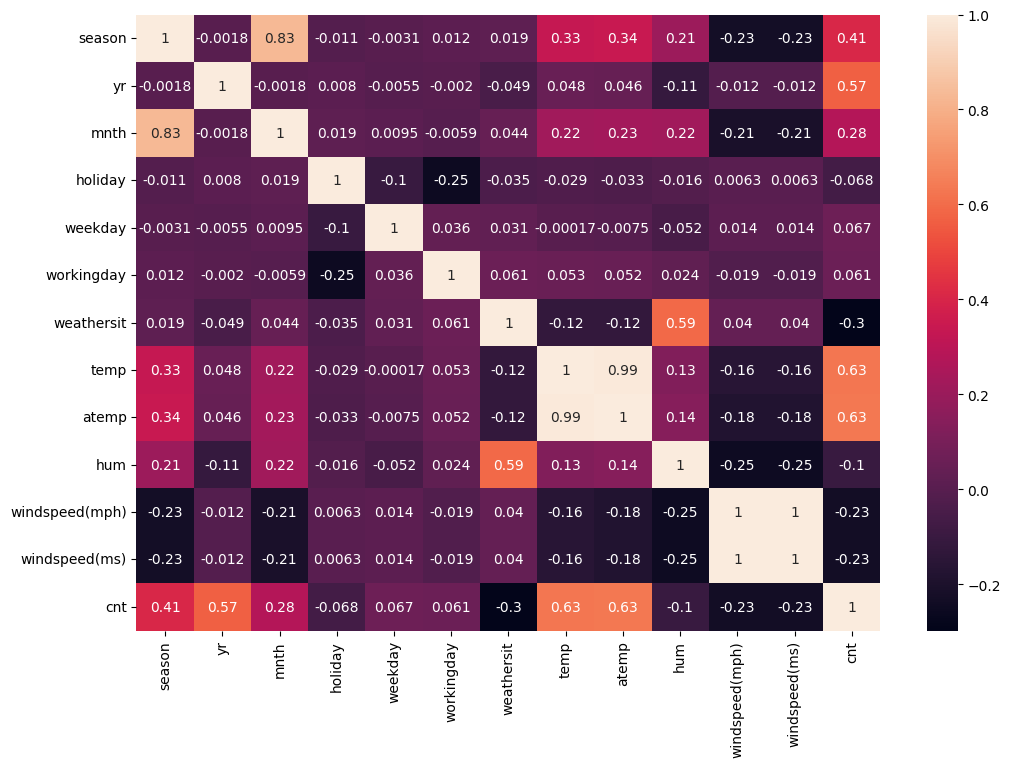

In [109]:
plt.figure(figsize=(12, 8))
df=df.corr()
sns.heatmap(df, annot=True)

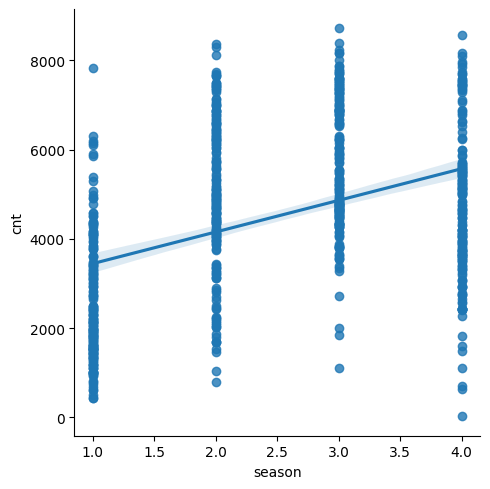

In [143]:
sns.lmplot(x='season', y='cnt', data = df)



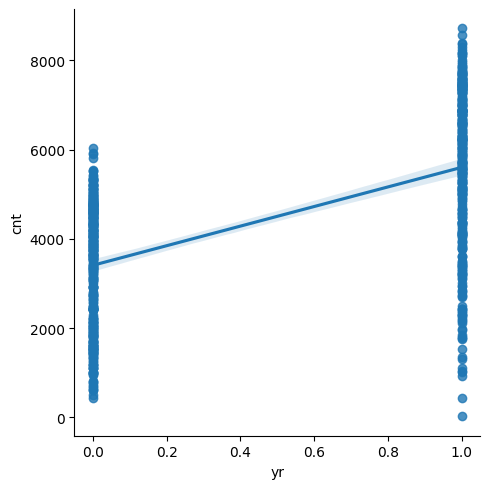

In [144]:
sns.lmplot(x='yr', y='cnt', data = df)

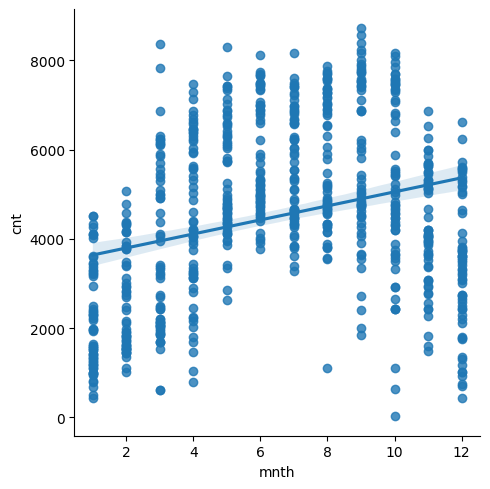

In [145]:
sns.lmplot(x='mnth', y='cnt', data = df)

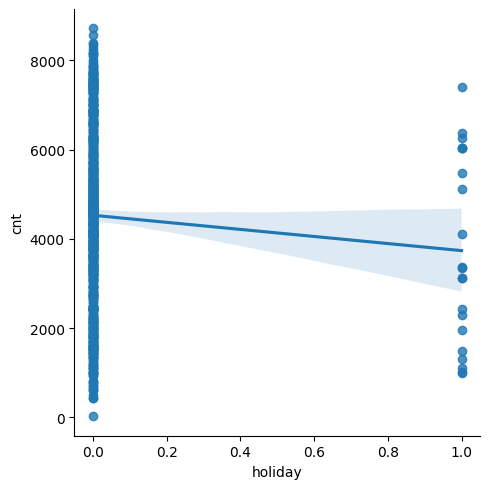

In [146]:
sns.lmplot(x='holiday', y='cnt', data = df)

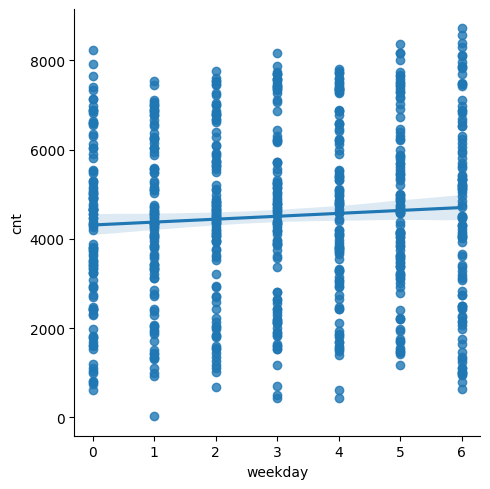

In [147]:
sns.lmplot(x='weekday', y='cnt', data = df)

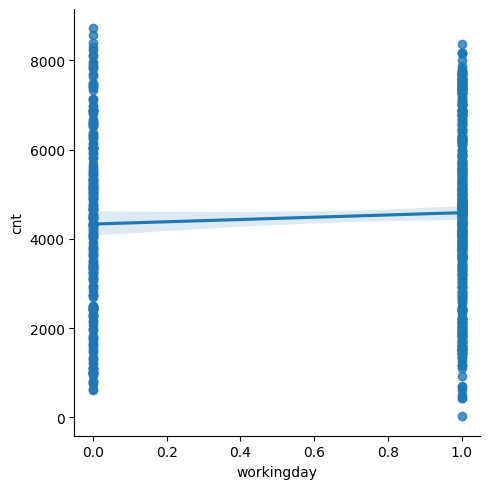

In [148]:
sns.lmplot(x='workingday', y='cnt', data = df)

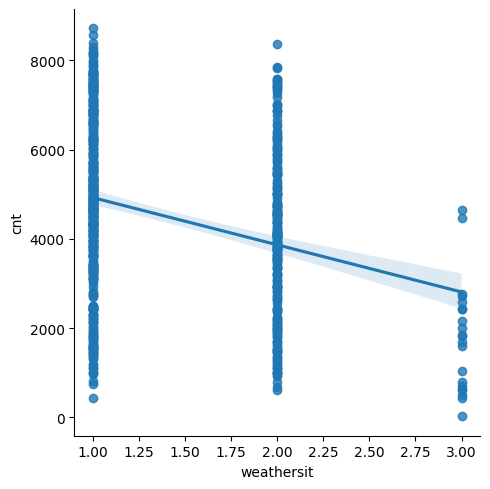

In [149]:
sns.lmplot(x='weathersit', y='cnt', data = df)

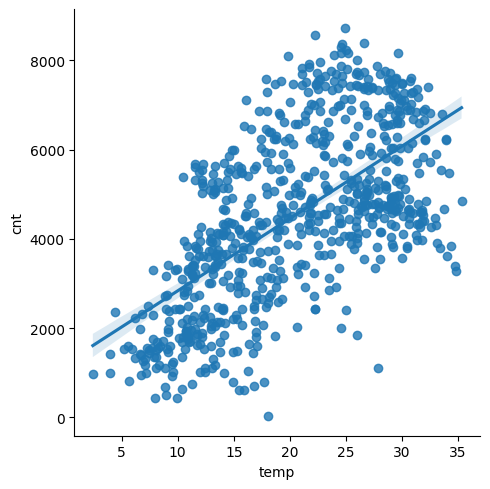

In [150]:
sns.lmplot(x='temp', y='cnt', data = df)

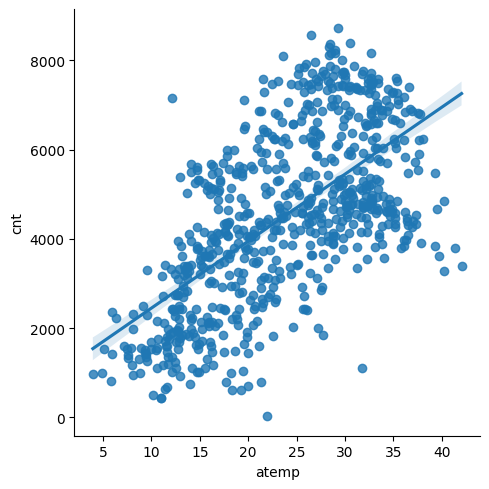

In [151]:
sns.lmplot(x='atemp', y='cnt', data = df)

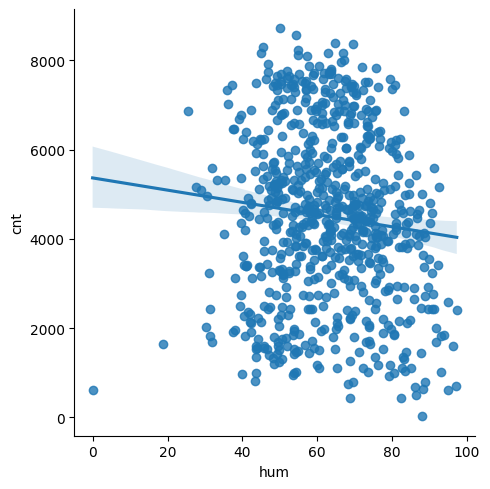

In [152]:
sns.lmplot(x='hum', y='cnt', data = df)

In [154]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349


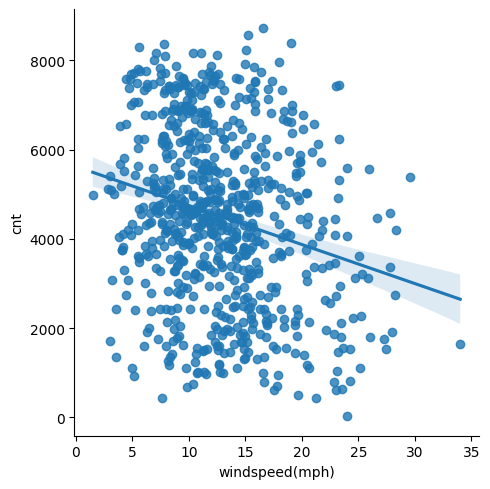

In [156]:
sns.lmplot(x='windspeed(mph)', y='cnt', data = df)

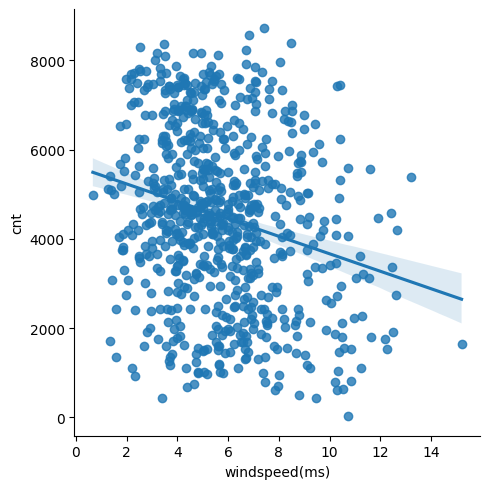

In [157]:
sns.lmplot(x='windspeed(ms)', y='cnt', data = df)

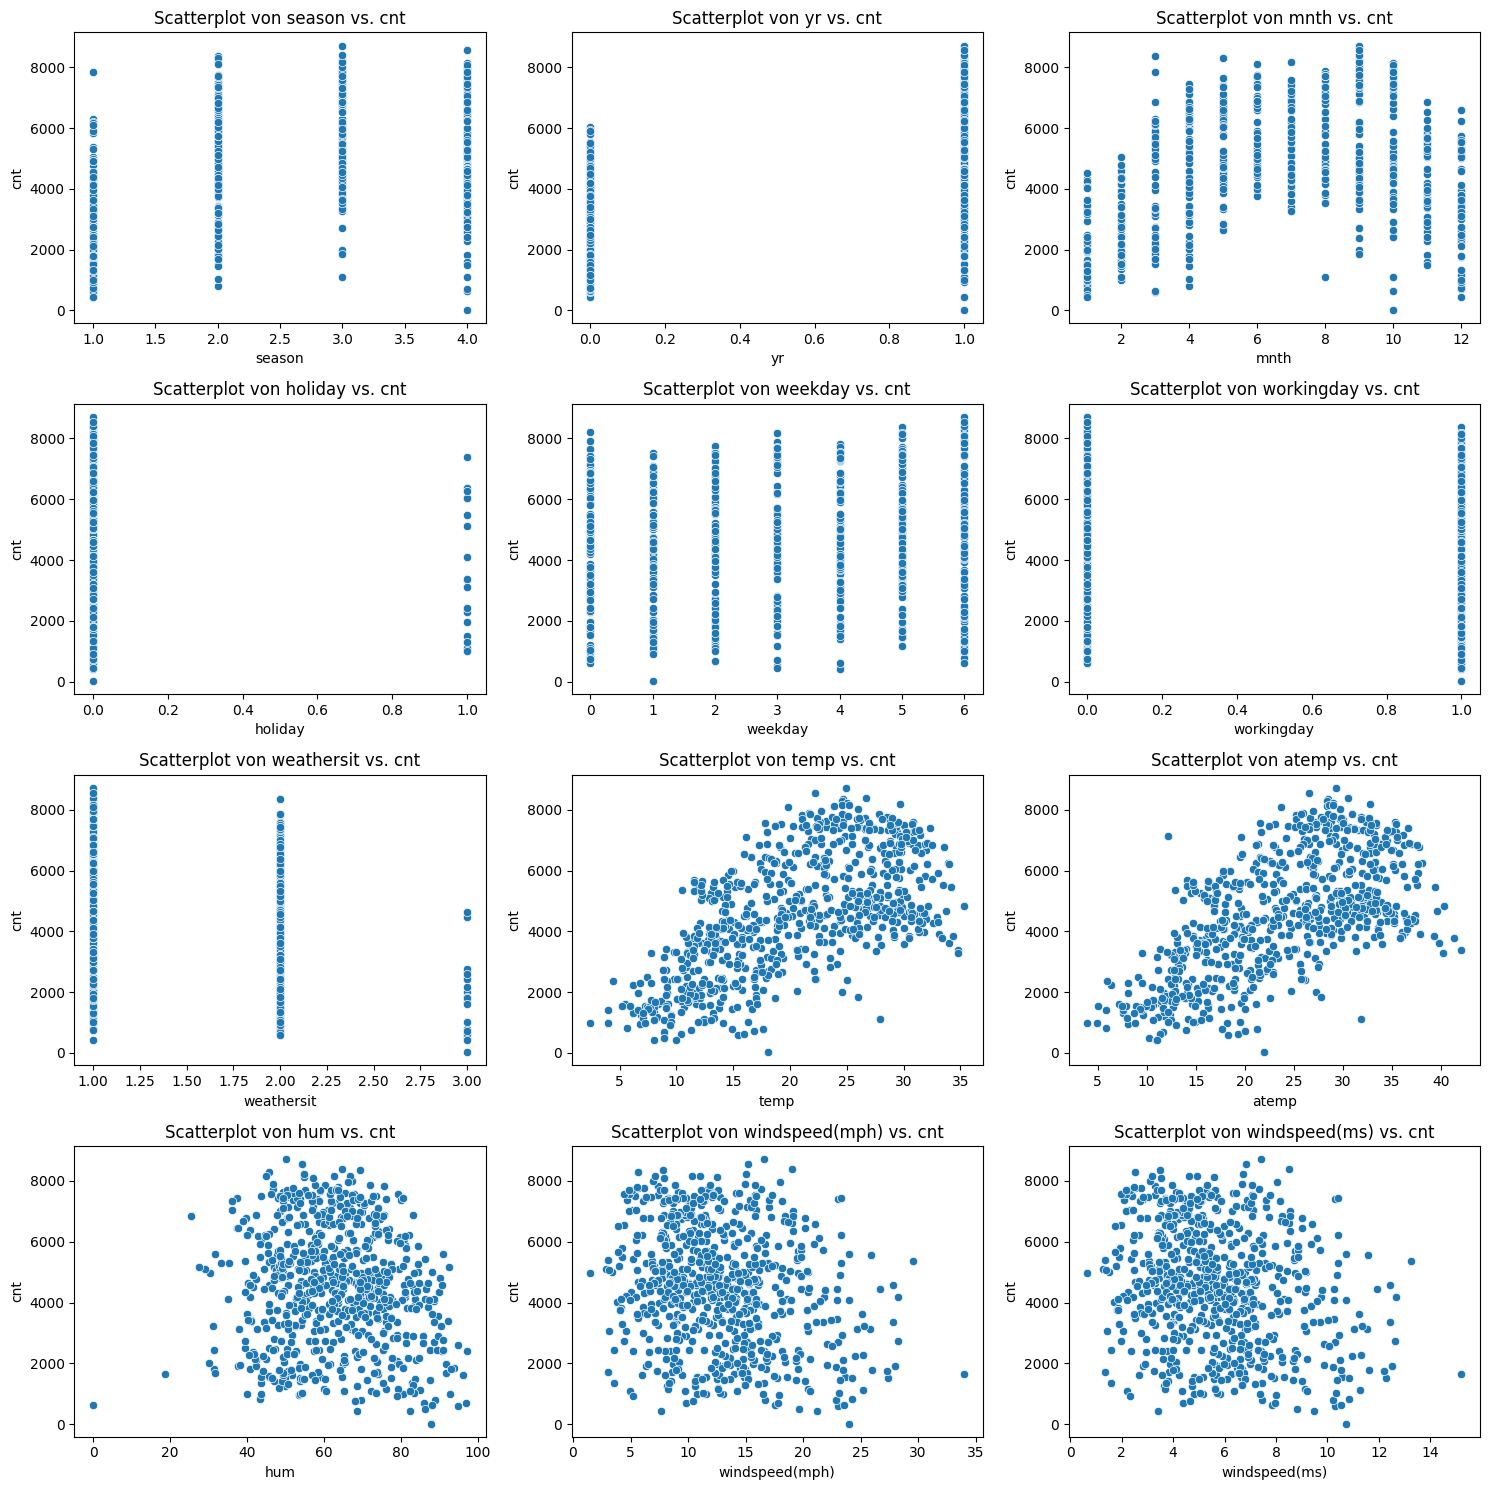

In [142]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()#macht 1D-Array

for i, col in enumerate(df.columns[:-1]):  # Alle Spalten außer 'cnt'
        sns.scatterplot(x=col, y='cnt', data=df, ax=axes[i])
        axes[i].set_title(f'Scatterplot von {col} vs. cnt')

# Layout anpassen
plt.tight_layout()
plt.show()

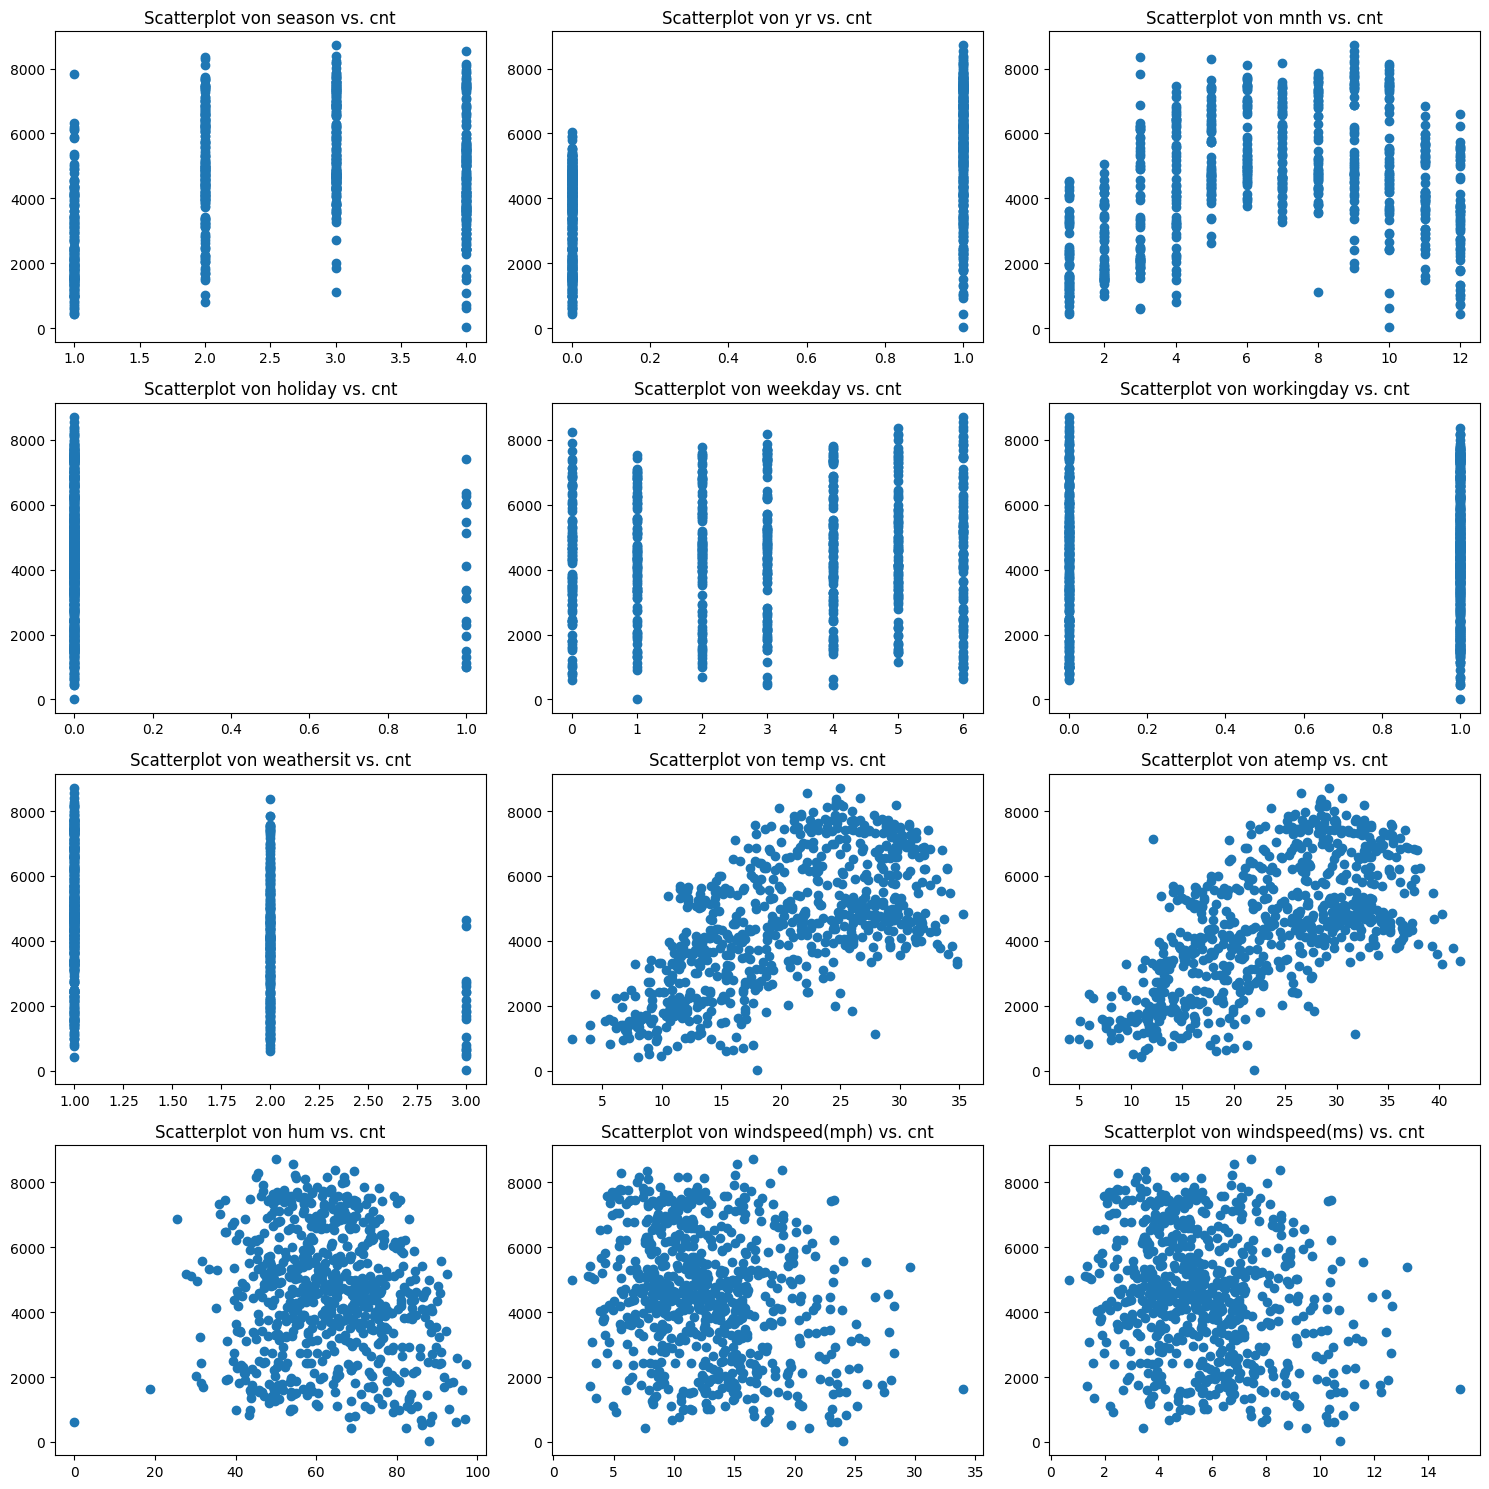

In [162]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()#macht 1D-Array

for i, col in enumerate(df.columns[:-1]):  # Alle Spalten außer 'cnt'
        plt.subplot(4,3, i+1)
        plt.scatter(x=col, y='cnt', data=df)# ax=axes[i]
        axes[i].set_title(f'Scatterplot von {col} vs. cnt')

# Layout anpassen
plt.tight_layout()
plt.show()

Frage:

1. Wie ist die Abhängigkeit der Anzahl der Vermietungen vom Monat? nicht linear
2. Bezeichnen Sie ein oder zwei Anzeichen, von denen die Anzahl der Würfe höchstwahrscheinlich linear abhängt. temp, atemp und cnt sind linear

In [124]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977


***Aufgabe 2***

Lassen Sie uns den Grad der linearen Abhängigkeit zwischen den Features und der Zielvariablen genauer schätzen. Ein gutes Maß für die lineare Beziehung zwischen zwei Vektoren ist die Pearson-Korrelation. Wir haben schon einmal mit ihr zu tun gehabt. Um es in Pandas zu berechnen, können Sie die Dataframe-Methoden ***corr*** und ***corrwith*** verwenden.

Zählen Sie die Korrelationen aller Merkmale mit Ausnahme des letzten mit dem letzten mit der Methode ***corrwith***.

In [125]:
# Put your code here
correlations = df.iloc[:, :-1].corrwith(df['cnt'])
print(correlations)

season            0.540625
yr                0.594735
mnth              0.414629
holiday          -0.195109
weekday          -0.059204
workingday       -0.006937
weathersit       -0.646875
temp              0.803237
atemp             0.806112
hum              -0.193099
windspeed(mph)   -0.577469
windspeed(ms)    -0.577469
dtype: float64


In [168]:
correlations = df.iloc[:, :-1].corrwith(df['cnt'], axis=0, method='pearson')
print(correlations) 

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


In [165]:
correlations = df.iloc[:, :-1].corr(method='pearson')
print(correlations)

                  season        yr      mnth   holiday   weekday  workingday  \
season          1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr             -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth            0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday        -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday        -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday      0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit      0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp            0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp           0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum             0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed(mph) -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
windspeed(ms)  -0.229046 -0.011817 -0.20

Es gibt Merkmale in der Stichprobe, die mit denen des Zielmerkmals korrelieren, was bedeutet, dass die Aufgabe mit linearen Methoden gelöst werden kann.

Die Diagramme zeigen, dass einige Anzeichen einander ähnlich sind. Lassen Sie uns daher auch die Korrelationen zwischen den Materialeigenschaften berechnen.

***Aufgabe 3***

Zählen Sie die paarweisen Korrelationen zwischen den Merkmalen **temp**, **atemp**, **hum**, **windspeed(mph)**, **windspeed(ms)** und **cnt** mit der **corr**-Methode:

In [126]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977


In [127]:
# Put your code here
col= ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
correlation_matrix = df[col].corr()
correlation_matrix

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.999637,0.062129,-0.543959,-0.543959,0.803237
atemp,0.999637,1.000000,0.080631,-0.564259,-0.564259,0.806112
hum,0.062129,0.080631,1.000000,-0.517216,-0.517216,-0.193099
windspeed(mph),-0.543959,-0.564259,-0.517216,1.000000,1.000000,-0.577469
windspeed(ms),-0.543959,-0.564259,-0.517216,1.000000,1.000000,-0.577469
cnt,0.803237,0.806112,-0.193099,-0.577469,-0.577469,1.000000


Auf den Diagonalen befinden sich erwartungsgemäß Einheiten. Es gibt jedoch zwei weitere Paare von stark korrelierten Spalten in der Matrix: temp und atemp (von Natur aus korreliert) und zwei Windgeschwindigkeit (da nur eine Einheit in eine andere umgewandelt wird). Als nächstes werden wir sehen, dass sich diese Tatsache negativ auf das Training des linearen Modells auswirkt.

Schauen wir uns zum Schluss die mittleren Merkmale (Mittelwertmethode) an, um die Skala von Merkmalen und Brüchen von 1 in binären Merkmalen zu schätzen.

In [128]:
mean_values = df.mean()
mean_values

season            0.206024
yr                0.113404
mnth              0.186986
holiday           0.038018
weekday           0.077073
workingday        0.077021
weathersit        0.092474
temp              0.225825
atemp             0.223267
hum               0.117963
windspeed(mph)    0.059100
windspeed(ms)     0.059100
cnt               0.208035
dtype: float64

In [171]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349


In [173]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
for col in binary_columns:
    ratio = df[col].mean()
    print(f"Anteil von 1 in {col}: {ratio:.2f}")

Anteil von 1 in yr: 0.50
Anteil von 1 in holiday: 0.03
Anteil von 1 in workingday: 0.68


***Aufgabe 4***

Leiten Sie die durchschnittlichen Anzeichen ab.

In [174]:
# Put your code here
mean_values = df.mean()
mean_values

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Merkmale haben unterschiedliche Maßstäbe, daher ist es für uns für die weitere Arbeit besser, die Matrix der Objekt-Merkmale zu normalisieren.

##### Problem eins: Kollineare Zeichen #####

In unseren Daten dupliziert also ein Merkmal ein anderes, und es gibt zwei weitere, die sich sehr ähnlich sind. Natürlich könnten wir die Duplikate sofort entfernen, aber mal sehen, wie das Modell trainiert würde, wenn wir dieses Problem nicht bemerken würden.

Lassen Sie uns zunächst die Merkmale skalieren oder standardisieren: Subtrahieren Sie den Mittelwert von jedem Merkmal und dividieren Sie ihn durch die Standardabweichung. Dies kann mit der Skalenmethode erfolgen.

Darüber hinaus ist es notwendig, die Probe zu mischen, was für die Kreuzvalidierung erforderlich ist.

In [176]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [177]:
df_shuffled = shuffle(df, random_state=42)# shuffle - mischen
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Trainieren wir die lineare Regression mit unseren Daten und sehen wir uns die Gewichtungen der Features an.

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model=LinearRegression()
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [185]:
model.score(X_train,y_train)

0.8062155373857774

In [186]:
model.score(X_test, y_test)

0.7801104943266022

***Aufgabe 5***

Erstellen Sie ein lineares Regressorobjekt, trainieren Sie es mit allen Daten und geben Sie die Modellgewichtungen aus (die Gewichtungen werden in der Variablen coef_ der Regressorklasse gespeichert). Es ist möglich, Paare (Eigenschaftsname, Gewichtung) mit der in die Python-Sprache integrierten zip-Funktion auszugeben. Feature-Namen werden in der Variablen df.columns gespeichert.

In [192]:
# Put your code here
feature_weights = list(zip(df.drop(columns=['cnt']).columns, model.coef_))
print("Modellgewichtungen (Feature, Gewichtung):")
for feature, weight in feature_weights:
    print(f"{feature}: {weight:.2f}")

Modellgewichtungen (Feature, Gewichtung):
season: 554.02
yr: 1017.41
mnth: -118.08
holiday: -33.02
weekday: 221.59
workingday: -39.65
weathersit: -307.48
temp: 54.87
atemp: 807.22
hum: -245.99
windspeed(mph): 39088793474436.59
windspeed(ms): -39088793474665.02


Wir sehen, dass die Gewichtungen bei linear-abhängigen Merkmalen modulo viel größer sind als bei anderen Merkmalen. 
Diese Situation wird als Problem der Multikollinearität bezeichnet.

Bei einem Paar (temp, atemp) mit etwas weniger korrelierten Variablen ist dies nicht der Fall, aber in der Praxis lohnt es sich immer, die Koeffizienten mit ähnlichen Vorzeichen sorgfältig zu überwachen.

Um das Problem der Multikollinearität zu lösen, müssen Sie einen Regularizer verwenden. Im ersten Fall heißt die Methode Lasso, und im zweiten Fall wird Ridge α hinzugefügt.

***Aufgabe 6***

Versuchen wir, lineare Modelle mit L1- und L2-Regularisierung zu trainieren und dann ihre Gewichtungen zu vergleichen. Trainieren Sie die Ridge- und Lasso-Regressoren mit den Standardeinstellungen und stellen Sie sicher, dass das Problem mit den Skalen behoben ist.

Trainieren Sie das lineare Modell mit L1-Regularisierung (Lasso-Klasse) und leiten Sie die Skalen ab.

In [135]:
# Put your code here
'''season: 560.241616031
yr: 1019.46349407
mnth: -128.730627037
holiday: -86.1527813337
weekday: 137.347893905
workingday: 55.2123706414
weathersit: -332.369856962
temp: 376.36323621
atemp: 576.530793505
hum: -144.129155003
windspeed(mph): -197.139689402
windspeed(ms): -2.80498119457e-08'''

'season: 560.241616031\nyr: 1019.46349407\nmnth: -128.730627037\nholiday: -86.1527813337\nweekday: 137.347893905\nworkingday: 55.2123706414\nweathersit: -332.369856962\ntemp: 376.36323621\natemp: 576.530793505\nhum: -144.129155003\nwindspeed(mph): -197.139689402\nwindspeed(ms): -2.80498119457e-08'


Trainieren Sie das lineare Modell mit der L2-Regularisierung (Ridge-Klasse) und leiten Sie die Gewichtungen ab.

In [136]:
# Put your code here
'''season: 563.064572252
yr: 1018.94837879
mnth: -131.873320282
holiday: -86.7460979971
weekday: 138.005111179
workingday: 55.9031103751
weathersit: -332.349788499
temp: 386.457889192
atemp: 566.34704706
hum: -145.071327299
windspeed(mph): -99.2594410818
windspeed(ms): -99.2594411544'''

'season: 563.064572252\nyr: 1018.94837879\nmnth: -131.873320282\nholiday: -86.7460979971\nweekday: 138.005111179\nworkingday: 55.9031103751\nweathersit: -332.349788499\ntemp: 386.457889192\natemp: 566.34704706\nhum: -145.071327299\nwindspeed(mph): -99.2594410818\nwindspeed(ms): -99.2594411544'

***Aufgabe 7***

Im Gegensatz zur L2-Regularisierung setzt L1 die Skalen bei einigen Vorzeichen auf Null. Beobachten wir, wie sich die Gewichte mit zunehmendem Regularisierungsfaktor ändern α .

Trainieren Sie für jeden Wert des Koeffizienten mit Alphas den Lasso-Regressor und schreiben Sie die Skalen in die Liste coefs_lasso, trainieren Sie dann Ridge und schreiben Sie die Skalen in die Liste coefs_ridge. Konvertieren Sie die resultierenden Listen in np.array.

In [137]:
alphas = np.arange(1, 500, 50)

coefs_lasso = # Put your code here
coefs_ridge = # Put your code here

for alpha in alphas:
    # Put your code here

# Put your code here

SyntaxError: invalid syntax (1583820807.py, line 3)

Analysieren Sie die Dynamik der Skalen, wenn der Regularisierungsparameter zunimmt:

In [ ]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Analysieren Sie die Diagramme, und beantworten Sie die folgenden Fragen.

- Welcher Regularizer (Ridge oder Lasso) reduziert die Gewichte aggressiver bei gleichem Alpha?
- Was passiert mit Lasso-Schuppen, wenn Alpha extra groß gemacht wird? Erklären Sie, warum dies geschieht.
- Kann man argumentieren, dass Lasso eines der Zeichen der Windgeschwindigkeit bei jedem Wert von Alpha > 0 ausschließt? Und Ridge? Es wird angenommen, dass der Regularisierer das Merkmal ausschließt, wenn der Koeffizient kleiner als 10−3 ist.
- Welcher der Regularizer eignet sich für die Auswahl von nicht-informativen Funktionen?

***Aufgabe 8***

Als nächstes werden wir mit Lasso arbeiten.

Wir sehen also, dass, wenn sich Alpha ändert, das Modell die Koeffizienten von Merkmalen auf unterschiedliche Weise auswählt. Wir müssen die beste Alpha auswählen.

Um dies zu erreichen, benötigen wir zunächst eine Qualitätsmetrik. Wir werden die optimierte Funktionalität der Methode der kleinsten Quadrate selbst, d.h. den Mean Square Error, als Metrik verwenden.

Zweitens müssen Sie verstehen, auf welchen Daten diese Metrik berechnet werden soll. Es ist unmöglich, Alpha anhand des-Werts in der Trainingsstichprobe auszuwählen, da wir dann nicht abschätzen können, wie das Modell Vorhersagen auf der Grundlage neuer Daten treffen wird. Wenn wir eine Stichprobe auswählen, die in Training und Test aufgeteilt ist (dies wird als Holdout bezeichnet), stimmen wir uns auf bestimmte "neue" Daten ein und können erneut trainieren. Daher werden wir mehrere Stichprobenaufteilungen durchführen, jeweils unterschiedliche Alphawerte ausprobieren und dann den-Durchschnitt ermitteln. Es ist am bequemsten, solche Aufteilungen durch Kreuzvalidierung vorzunehmen, dh die Stichprobe in K Teile zu unterteilen und jedes Mal einen von ihnen als Test zu nehmen und aus den verbleibenden Blöcken eine Trainingsstichprobe zu erstellen.

Die Kreuzvalidierung für die Regression in sklearn ist recht einfach: Es gibt einen speziellen Regressor dafür, LassoCV, der eine Liste von Alphas als Eingabe nimmt und für jeden von ihnen bei der Kreuzvalidierung berechnet. Nach dem Training (wenn Sie den Standardparameter cv=3 belassen) enthält der Regressor eine Variable_path_, eine Größenmatrix len(alpha) x k, k = 3 (die Anzahl der Blöcke in der Kreuzvalidierung), die den-Wert im Test für die jeweiligen Durchläufe enthält. Darüber hinaus speichert die Variable alpha_ den ausgewählten Wert des Regularisierungsparameters und im coef_ traditionell die trainierten Skalen, die diesem alpha_ entsprechen.

Beachten Sie, dass der Regressor die Reihenfolge ändern kann, in der er Alphas durchläuft. Für den Vergleich mit der-Matrix ist es besser, die Regressorvariable alphas_ zu verwenden.

Trainieren Sie den LassoCV-Regressor mit allen Regularisierungsparametern mit Alpha. Plotten Sie den Durchschnitt über die-Zeilen in Abhängigkeit von Alpha (verwenden Sie dazu die Funktion create_plot).

Gibt das ausgewählte Alpha sowie die Eigenschaft-Koeffizienten-Paare für den trainierten Koeffizientenvektor aus.

In [ ]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

In [ ]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = # Put your code here
'''Alpha = 6

season: 532.018982841
yr: 1015.06022264
mnth: -100.039526144
holiday: -83.2939598753
weekday: 132.504465491
workingday: 51.5570856141
weathersit: -330.55985674
temp: 370.67985503
atemp: 581.396931065
hum: -140.007405501
windspeed(mph): -191.771408471
windspeed(ms): -2.68545418157e-08'''

Wir haben also einen bestimmten Regularisierungsparameter ausgewählt. Schauen wir uns an, welche Alpha wir wählen würden, wenn wir die Stichprobe nur einmal in Training und Test aufteilen würden, d. h. die-Trajektorien berücksichtigen, die den einzelnen Stichprobenblöcken entsprechen.

***Aufgabe 9***

Geben Sie die Alpha-Werte aus, die den-Minima auf jeder Partition entsprechen (d. h. nach Spalten). Visualisieren Sie in drei separaten Diagrammen die Spalten mse_path_.

In [ ]:
# Put your code here
'''Alphas with minimum MSE:
Alpha = 41, MSE = 843336.181499
Alpha = 6, MSE = 772598.495628
Alpha = 1, MSE = 745668.605961'''

Auf jeder Partition ist der optimale Alpha-Wert unterschiedlich und entspricht einem großen MSE auf anderen Partitionen. Es stellt sich heraus, dass wir uns auf bestimmte Trainings- und Kontrollstichproben einstellen. Bei der Auswahl von Alpha bei der Kreuzvalidierung wählen wir etwas "Durchschnittliches", das einen akzeptablen Metrikwert für verschiedene Stichprobenaufschlüsselungen ergibt.

***Aufgabe 10***
- Frage 1

Wählen Sie im letzten trainierten Modell die 4 Merkmale mit den höchsten (positiven) Koeffizienten aus (und schreiben Sie sie aus), sehen Sie sich die Visualisierungen der cnt-Abhängigkeiten von diesen Merkmalen an, die wir im Block "Dateneinführung" dargestellt haben. Ist die zunehmende lineare Abhängigkeit von cnt von diesen Merkmalen in den Graphen sichtbar? Ist es logisch zu sagen (auf der Grundlage des gesunden Menschenverstandes), dass je wichtiger diese Zeichen sind, desto mehr Menschen werden das Fahrrad nehmen wollen?

- Frage 2

Wählen Sie 3 Zeichen mit den größten negativen Modulo-Koeffizienten (und schreiben Sie sie aus), schauen Sie sich die entsprechenden Visualisierungen an. Ist ein abnehmender linearer Zusammenhang sichtbar? Ist es logisch zu sagen, dass je größer das Ausmaß dieser Zeichen ist, desto weniger Menschen werden das Fahrrad nehmen wollen?

- Frage 3

Notieren Sie Zeichen mit Koeffizienten nahe Null (< 1e-3). Warum glaubst du, hat das Modell sie aus dem Modell ausgeschlossen (schau dir die Diagramme noch einmal an)? Stimmt es, dass sie die Nachfrage nach Fahrrädern in keiner Weise beeinflussen?

### Schlussfolgerung ###
Wir haben uns also angesehen, wie Sie die Angemessenheit des linearen Modells überwachen können, wie Sie Merkmale auswählen und wie Sie den Regularisierungskoeffizienten kompetent auswählen können, wenn möglich, ohne sich auf einen bestimmten Teil der Daten einzulassen.

Es ist erwähnenswert, dass es mit Hilfe der Kreuzvalidierung zweckmäßig ist, nur eine kleine Anzahl von Parametern auszuwählen. (1, 2, maximal 3), da wir für jede zulässige Kombination von ihnen das Modell mehrmals trainieren müssen. Dieser Prozess nimmt viel Zeit in Anspruch, insbesondere wenn Sie aus großen Datenmengen lernen müssen.